In [1]:
# Import dependencies
from statistics import mode
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
from requests import Session


In [2]:
ff1.Cache.enable_cache('cache') 

In [6]:
year=2022
grand_prix='Miami'
session='Q'
driver_1 = 'VER'
driver_2 = 'LEC'

In [7]:
session_data = ff1.get_session(year, grand_prix, session)
session_data.load()
laps_driver_1 = session_data.laps.pick_driver(driver_1)
laps_driver_2 = session_data.laps.pick_driver(driver_2)

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.5]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
core        WARNING 	No lap data for driver 31
api            INFO 	No cached data found for track_status_data. Load

In [8]:
laps_driver_1.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [9]:
laps_driver_1[laps_driver_1['LapNumber']==5]['LapTime'].values[0]/ np.timedelta64(1, 's')

89.836

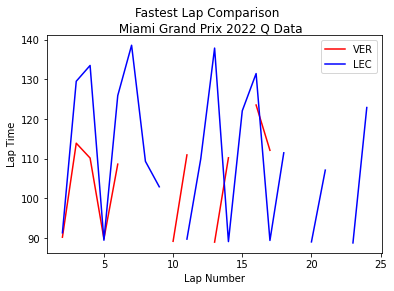

In [13]:
fig, ax = plt.subplots()
ax.plot(laps_driver_1['LapNumber'], laps_driver_1['LapTime']/np.timedelta64(1,'s'), color='red', label=driver_1)
ax.plot(laps_driver_2['LapNumber'], laps_driver_2['LapTime']/np.timedelta64(1,'s'), color='blue', label=driver_2)

ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
    f"{session_data.event['EventName']} {session_data.event.year} {session} Data")
plt.show()

In [15]:
min(laps_driver_1.LapNumber.max(), laps_driver_2.LapNumber.max())

17.0

In [16]:
session_data.laps.LapNumber.max()

25.0